In [1]:
conda install -c conda-forge pip-upgrader

/bin/sh: /Users/CassidyEllis/opt/anaconda3/bin/conda: No such file or directory

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge setuptools

/bin/sh: /Users/CassidyEllis/opt/anaconda3/bin/conda: No such file or directory

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge xgboost

/bin/sh: /Users/CassidyEllis/opt/anaconda3/bin/conda: No such file or directory

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge category_encoders

/bin/sh: /Users/CassidyEllis/opt/anaconda3/bin/conda: No such file or directory

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c anaconda scikit-learn

/bin/sh: /Users/CassidyEllis/opt/anaconda3/bin/conda: No such file or directory

Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install -c conda-forge eli5

/bin/sh: /Users/CassidyEllis/opt/anaconda3/bin/conda: No such file or directory

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
import xlsxwriter


import pandas as pd 
import numpy as np 
import pandas as DataFrame


from sklearn.pipeline import make_pipeline


import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
   

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams



path = ('/Users/CassidyEllis/Data Science/Unit 2 Lambda/Data Sets/Dresses_Attribute_Sales/Dress_sales.xlsx')
xl = pd.ExcelFile(path)

print(xl.sheet_names)

['Sheet1', 'Sheet2', 'Sheet3']


In [2]:
df = xl.parse('Sheet1')

In [4]:
df.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [5]:
len(df)

500

In [3]:
# Split into train and test set

In [4]:
train, test = train_test_split(df, test_size = .20, random_state = 42)

In [5]:
def Wrangle(X):
    
    X = X.copy()
    
    # fill missing values
    X = X.fillna('Missing')
    
    
    
    # Combine columns values that were the same but misspelled
    X['Price'] = X['Price'].replace({'low': 'Low','high': 'High','Missing':'Average'})
    X['Season'] = X['Season'].replace({'summer': 'Summer','spring': 'Spring'
                                     ,'Automn':'Autumn','winter':'Winter','Missing':'Casual'})
    X['Style'] = X['Style'].replace({'sexy': 'Sexy','Missing':'Casual'})
    X['Size'] = X['Size'].replace({'s': 'S','small':'S'})
    X['SleeveLength'] = X['SleeveLength'].replace({'thressqatar': 'threequarter','sleeevless': 'sleeveless', 'sleevless': 'sleeveless','sleveless' :'sleeveless', 'cap-sleeves':'capsleeves', 'Missing':'sleeveless'})
    X['NeckLine'] = X['NeckLine'].replace({'open': 'o-neck','Missing':'o-neck'})
    
    X['Good_rating'] = X['Rating'] >= 3.5
    X['Good_rating'] = X['Good_rating'].astype('int')
    
    X['Pattern_Type'] = X['Pattern Type']
    X = X.drop(columns=['Dress_ID', 'Pattern Type'])
    
    return X
df = Wrangle(df)    
train = Wrangle(train)
test = Wrangle(test)

df.shape

(500, 14)

In [6]:
df.Recommendation.value_counts(normalize = True)

0    0.58
1    0.42
Name: Recommendation, dtype: float64

In [7]:
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Recommendation,Good_rating,Pattern_Type
0,Sexy,Low,4.6,M,Summer,o-neck,sleeveless,empire,Missing,chiffon,ruffles,1,1,animal
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,Missing,ruffles,0,0,animal
2,vintage,High,0.0,L,Autumn,o-neck,full,natural,polyster,Missing,Missing,0,0,print
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,1,1,print
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,0,1,dot


In [8]:
df.dtypes

Style              object
Price              object
Rating            float64
Size               object
Season             object
NeckLine           object
SleeveLength       object
waiseline          object
Material           object
FabricType         object
Decoration         object
Recommendation      int64
Good_rating         int64
Pattern_Type       object
dtype: object

In [10]:
#choose target and features 
target = 'Recommendation'
features = df.columns.drop(['Recommendation'])

In [11]:
X = df[features]
y = df[target]
X.shape, y.shape

((500, 13), (500,))

In [12]:
#baseline 
# Check the target balance
y.value_counts(normalize = True)

0    0.58
1    0.42
Name: Recommendation, dtype: float64

In [13]:
majority_class = y.mode()[0]
y_pred = [majority_class] * len(y)

In [14]:
accuracy_score(y, y_pred)

0.58

In [15]:
# Encoding data

In [16]:
encoder = ce.OrdinalEncoder()
SimpleImputer(strategy='median')
X_transformed = encoder.fit_transform(X)

In [17]:
#5 for knn KNeighborsClassifier & W/ 10 fold cross-validation 

In [18]:
knn = KNeighborsClassifier(n_neighbors= 5)
scores = cross_val_score(knn,X_transformed,y, cv = 10, scoring = 'accuracy')
scores

array([0.52, 0.46, 0.54, 0.6 , 0.62, 0.54, 0.58, 0.54, 0.56, 0.56])

In [19]:
#average accuracy score for cross-validation 
scores.mean()

0.5520000000000002

In [20]:
k_range = range(1,31)
k_scores = []

In [21]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn,X_transformed,y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
k_scores

[0.49400000000000005,
 0.5319999999999999,
 0.51,
 0.56,
 0.5520000000000002,
 0.5619999999999999,
 0.548,
 0.546,
 0.5519999999999999,
 0.568,
 0.55,
 0.548,
 0.552,
 0.554,
 0.55,
 0.5399999999999998,
 0.544,
 0.554,
 0.552,
 0.5439999999999999,
 0.542,
 0.552,
 0.548,
 0.538,
 0.534,
 0.5399999999999999,
 0.524,
 0.514,
 0.5160000000000001,
 0.5260000000000001]

Text(0, 0.5, 'Cross_Validation Accuracy')

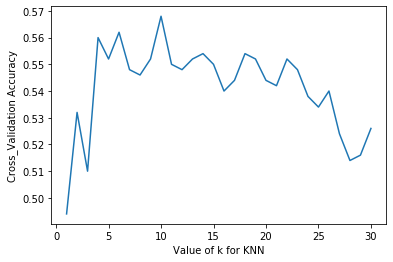

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot the value of k for knn(x-axis) versus the cross-validation (y-axis)

plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross_Validation Accuracy')

In [23]:
#test cross_val with best KNN
knn = KNeighborsClassifier(n_neighbors= 10)
cross_val_score(knn,X_transformed,y, cv = 10, scoring = 'accuracy').mean()

0.568

In [24]:
#10 fold w/Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
cross_val_score(log_reg, X_transformed, y, cv = 10, scoring= 'accuracy').mean()

0.554

In [25]:
#10 fold w/ XGboost

In [26]:
XGb = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight= 13,
                gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',
                nthread=4,scale_pos_weight=1,seed=27
                )
XGb.fit(X_transformed, y)
cross_val_score(XGb,X_transformed,y, cv = 10, scoring = 'accuracy').mean()

0.5640000000000001

In [27]:
# Feature selection

Feature = ['Season','Rating','SleeveLength','Decoration','Style','Price','Size','FabricType']
X = df[Feature]

#Encode X
encoder = ce.OrdinalEncoder()
X_transformed = encoder.fit_transform(X)

X.shape,y.shape

((500, 8), (500,))

In [28]:
XGb = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight= 13,
                gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',
                nthread=4,scale_pos_weight=1,seed=27
                )
XGb.fit(X_transformed, y)
cross_val_score(XGb,X_transformed,y, cv = 10, scoring = 'accuracy').mean()

0.56

In [29]:
# Feature selection

Feature = ['Season','Style','Rating','Good_rating']
X = df[Feature]

#Encode X
encoder = ce.OrdinalEncoder()
X_transformed = encoder.fit_transform(X)

X.shape,y.shape

((500, 4), (500,))

In [30]:
XGb = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight= 13,
                gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',
                nthread=4,scale_pos_weight=1,seed=27
                )
XGb.fit(X_transformed, y)
cross_val_score(XGb,X_transformed,y, cv = 10, scoring = 'accuracy').mean()

0.6

In [31]:
feature_names = X_transformed.columns.tolist()
feature_names 

['Season', 'Style', 'Rating', 'Good_rating']

In [32]:
import eli5 
from eli5.sklearn import PermutationImportance

/Users/CassidyEllis/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/CassidyEllis/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

In [34]:
perm = PermutationImportance(XGb, random_state=42).fit(X_transformed, y)
eli5.show_weights(perm, feature_names =  feature_names)

Weight,Feature
0.0980 ± 0.0206,Style
0.0824 ± 0.0293,Season
0.0772 ± 0.0315,Rating
0.0096 ± 0.0117,Good_rating


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           500 non-null    object 
 1   Price           500 non-null    object 
 2   Rating          500 non-null    float64
 3   Size            500 non-null    object 
 4   Season          500 non-null    object 
 5   NeckLine        500 non-null    object 
 6   SleeveLength    500 non-null    object 
 7   waiseline       500 non-null    object 
 8   Material        500 non-null    object 
 9   FabricType      500 non-null    object 
 10  Decoration      500 non-null    object 
 11  Recommendation  500 non-null    int64  
 12  Good_rating     500 non-null    int64  
 13  Pattern_Type    500 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [36]:
#Cross validation with train and test set
train.shape, test.shape

((400, 14), (100, 14))

In [37]:
#choose target and features 
target = 'Recommendation'
features = ['Season','Style','Rating','Good_rating']

In [38]:
# split data X and y
X_train =  train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

X_train.shape, y_train.shape,X_test.shape,y_test.shape

((400, 4), (400,), (100, 4), (100,))

In [39]:
encoder = ce.OrdinalEncoder()
X_train_transformed = encoder.fit_transform(X_train)
X_test_transformed = encoder.fit_transform(X_test)

In [95]:
majority_class = y_test.mode()[0]
y_pred = [majority_class] * len(y_test)
accuracy_score(y_test, y_pred)

y_test.value_counts()

0    58
1    42
Name: Recommendation, dtype: int64

In [73]:
XGb = XGBClassifier()

XGb.fit(X_train_transformed, y_train)
XGb.fit(X_test_transformed, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
scores = cross_val_score(XGb,X_train_transformed,y_train, cv = 10, scoring = 'accuracy')

In [91]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.14)


In [74]:
cross_val_score(XGb,X_test_transformed,y_test, cv = 10, scoring = 'accuracy').mean()

0.52

In [89]:
#10 fold w/Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(log_reg, X_train_transformed, y_train, cv = 10, scoring= 'accuracy')
log_reg.fit(X_test_transformed, y_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.56 (+/- 0.07)


In [77]:
 from sklearn.metrics import confusion_matrix, classification_report

In [78]:
predictedLabels = XGb.predict(X_test_transformed)

matrix = confusion_matrix(y_test,predictedLabels)
print('printing confusion matrix for random forest')
print(matrix)


printing confusion matrix for random forest
[[52  6]
 [14 28]]


In [79]:
predictedLabels

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [80]:
print(classification_report(y_test,predictedLabels,target_names=['not recommended','recommended']))

                 precision    recall  f1-score   support

not recommended       0.79      0.90      0.84        58
    recommended       0.82      0.67      0.74        42

       accuracy                           0.80       100
      macro avg       0.81      0.78      0.79       100
   weighted avg       0.80      0.80      0.80       100



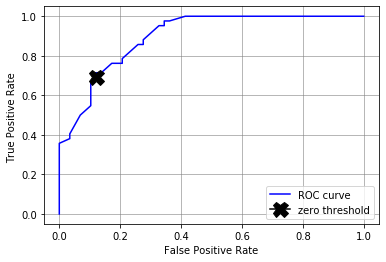

In [82]:
from sklearn.metrics import roc_curve
 
PosProEstimates = XGb.predict_proba(X_test_transformed)[:,1] # return the positive class' prediction probability esitmates
fpr, tpr, thresholds = roc_curve(y_test, PosProEstimates)
 
plt.plot(fpr,tpr, label='ROC curve',c='blue')
plt.grid(b=True,alpha=0.7,color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
close_zero = np.argmin(np.abs(np.array(thresholds) - 0.5)) # default classification threshold is 0.5. So finding the index for
# the calculated threshold closest to 0.5 requires subtracting 0.5 and finding the minimum absolute value. 
plt.plot(fpr[close_zero],tpr[close_zero],marker='X',label='zero threshold',ms=15,c='black')
plt.legend(loc='best')

In [86]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

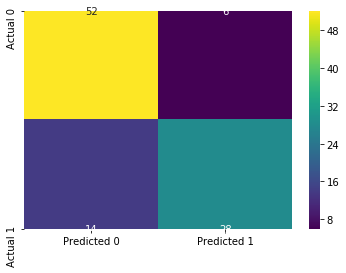

In [88]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                         columns=columns, index=index)
    
    
    
    

    
    return sns.heatmap(table, fmt='d',annot=True, cmap='viridis')
y_pred = XGb.predict(X_test_transformed)
plot_confusion_matrix(y_test, y_pred);